In [2]:
import sys

In [3]:
sys.path.append('../gidrophone/')

In [65]:
import importlib

In [323]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from scipy.ndimage import interpolation
import numpy as np
import random
# from prepair import open_raw, saveImage
import utils
params = {
    'axes.labelsize': 8,  # fontsize for x and y labels (was 10)
    'axes.titlesize': 8,
    'font.size': 8,
    'legend.fontsize': 8, 
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'figure.figsize': [20, 10],
    'font.family': 'serif'
}
matplotlib.rcParams.update(params)

In [72]:
importlib.reload(prepair)

<module 'prepair' from '../gidrophone/prepair.py'>

## Чтение Raw данных

Можно всместо чтения сгенирировать данные

In [82]:
b = prepair.open_raw('../../data/raw_2018.02.15_11.02.38.raw')

In [78]:
# plt.imshow(C, cmap='gray')

## Генерация модельных данных C[i,j]

signal - это звук от времени

In [335]:
plt.savefig('aha.png')

In [359]:
import main
importlib.reload(main)

<module 'main' from '../gidrophone/main.py'>

In [366]:
g = main.Gidrophone('../../data/raw_2018.02.15_11.02.38.raw', window=10, bound=[0, 1700, 768, 782], zoom=3)

In [367]:
signal = g.process(g.open_raw())

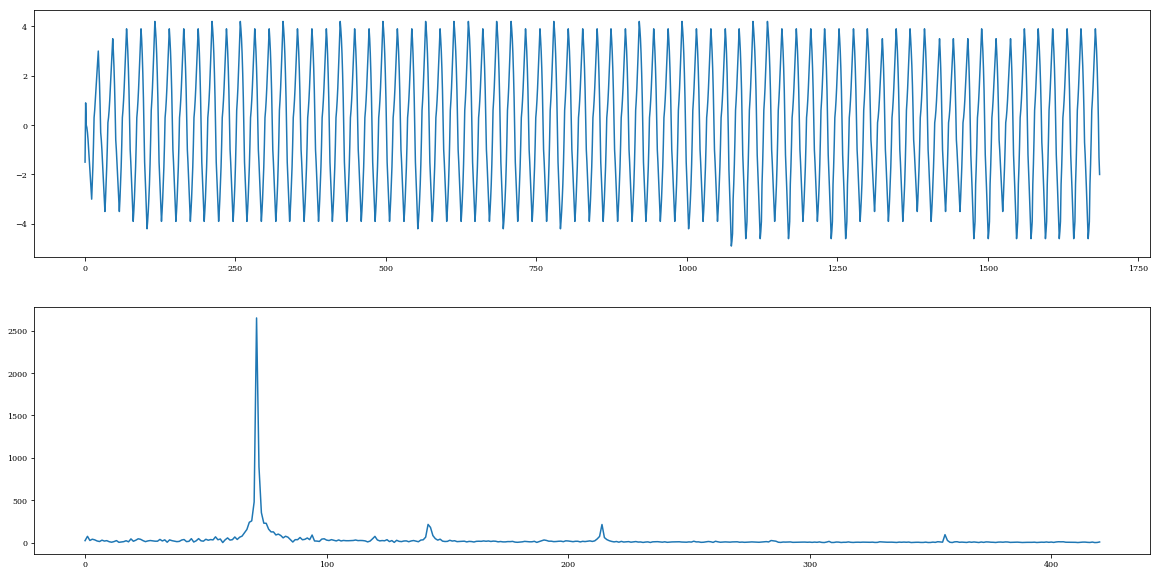

In [368]:
plt.subplot(2,1,1)
plt.plot(signal)
plt.subplot(2,1,2)
plt.plot(np.abs(np.fft.fft(signal))[:len(signal)//4])


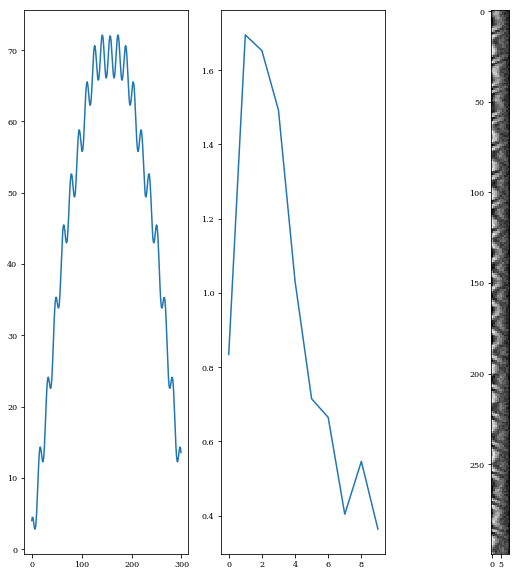

In [83]:
T = 300
L = 10
C = np.zeros((T, L))
signal = [3*np.cos(0.4*i)+70*np.sin(0.01*i)+np.cos(0.1*i) for i in range(T)]
mean = [np.cos(0.15*i) for i in range(L)]
ampl = [np.exp(-0.3*i) for i in range(L)]
for i in range(T):
    for j in range(L):
        C[i,j] =ampl[j]*np.cos(0.7*j+signal[i])+0.4*random.random() + mean[j]
#        C[i,j] =np.cos(j+signal[i])+0.1*random.random()

plt.subplot(1,3,1)
plt.plot(signal)
plt.subplot(1,3,2)
plt.plot(C[2,:])
plt.subplot(1,3,3)
plt.imshow(C, cmap='gray')


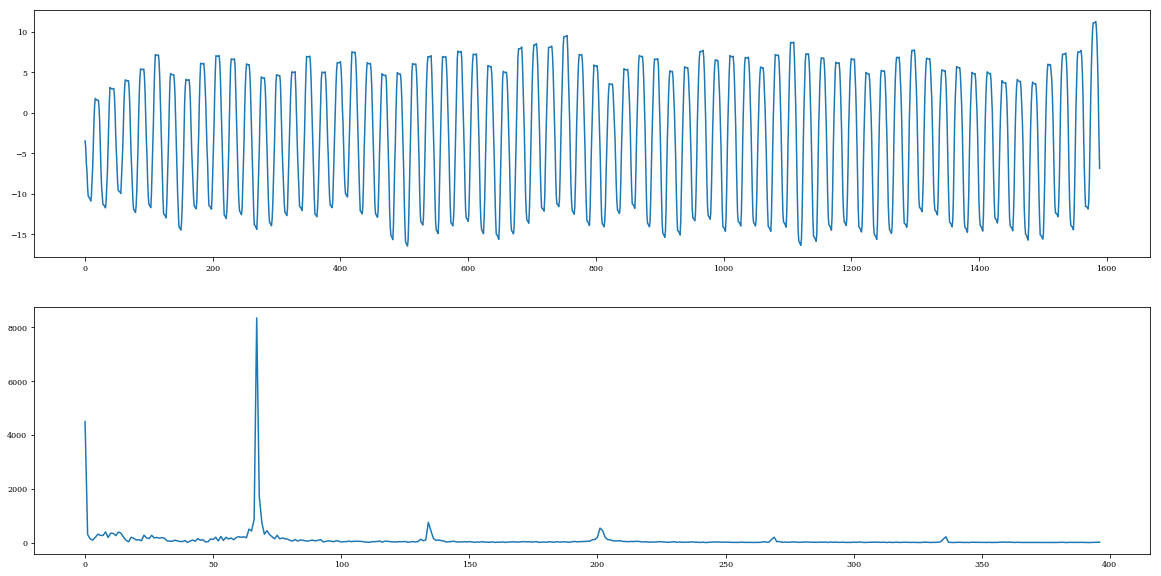

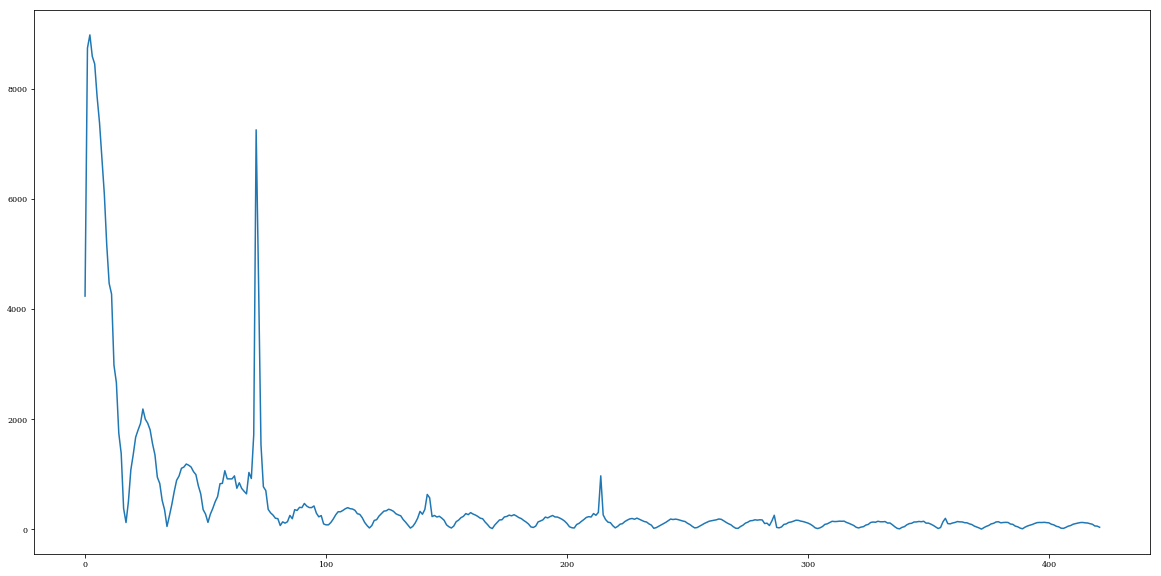

In [333]:
plt.plot(np.abs(np.fft.fft(signal))[:len(signal)//4])


## Интерполяция данных и нахождения фукции кросскорелляции

CPU times: user 849 ms, sys: 4.06 ms, total: 853 ms
Wall time: 855 ms


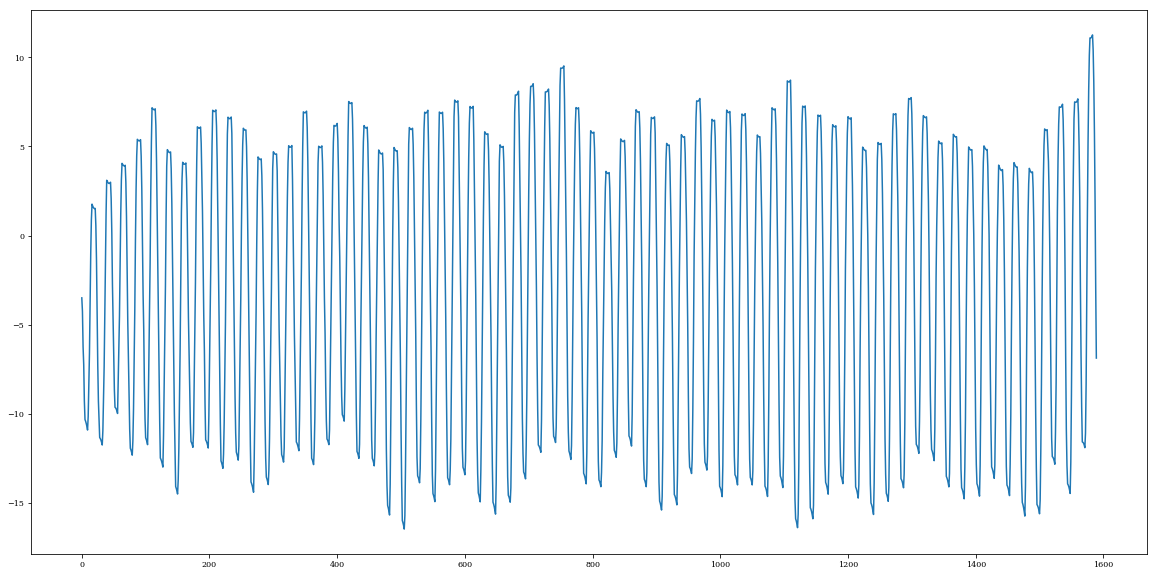

In [330]:
%%time
zoom = 10
C = b[:1700, 768:782]
C = (C - np.mean(C))/np.std(C)
#C = prepair.sub_prev(C)
signal = []
window = 100
means = []
window_avr_i = 0
for i in range(len(C)-zoom):
    zoomed =  interpolation.zoom(C[i:i+2,:], zoom, order=3)
    cor_array = np.correlate(zoomed[0,:], zoomed[-1,:], "full")
    cor = np.argmax(cor_array)
    cor -= len(cor_array)/2
    if(i>0):
        cor += signal[-1]+1/2
        
    if(i>window):
        window_avr_i += 1
        signal[window_avr_i] -= np.mean(signal[-window:])
    signal.append(cor)
    
plt.plot(signal[:-window])

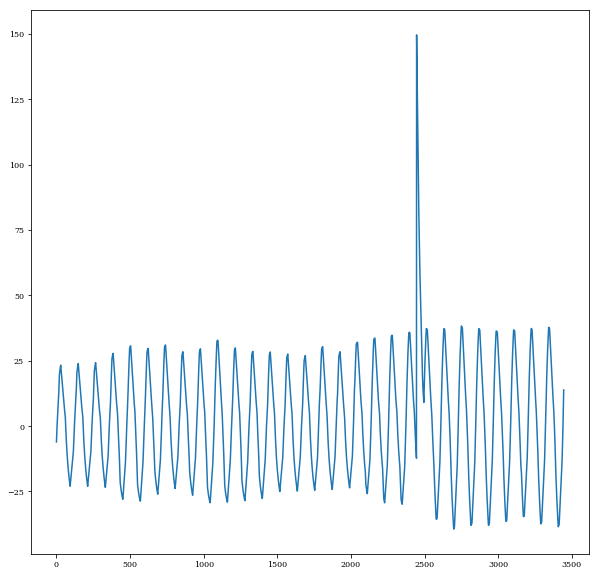

In [314]:
N = 50
plt.plot(np.array(signal)[N-1:]-np.convolve(signal, np.ones((N,))/N, mode='valid'))

In [266]:
fft = np.fft.fft(signal)

In [267]:
len(fft)

5980

In [268]:
len(fft[-int(9*len(signal)/10):])

5382

In [275]:
# fft[40:] = 0
fft[:3] = 0

/Users/p.logachev/pyenvs/paul/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


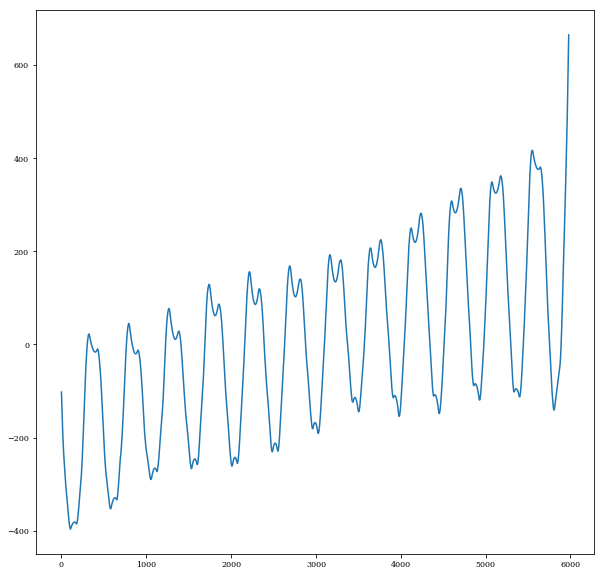

In [276]:
plt.plot(np.fft.ifft(fft))

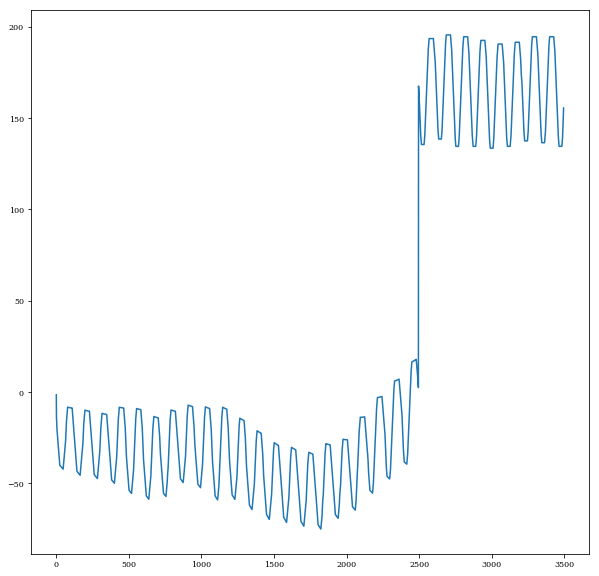

In [315]:
plt.plot(signal)

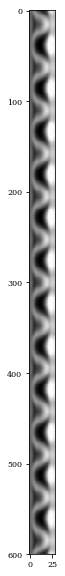

In [140]:
plt.imshow(C, cmap='gray')

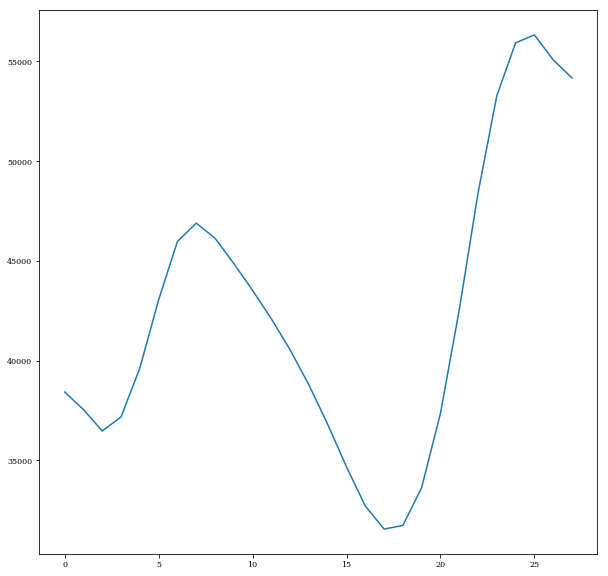

In [124]:
plt.plot(C[4,:])

In [132]:
 (C[4,:])/np.max(C[4,:])

array([ 0.68213449,  0.66647731,  0.64744728,  0.65996237,  0.70341902,
        0.76414826,  0.81610807,  0.83247532,  0.81910814,  0.79654548,
        0.77261592,  0.74728396,  0.719662  ,  0.68843641,  0.65339416,
        0.61549386,  0.58066463,  0.56014344,  0.56339203,  0.59713839,
        0.6630867 ,  0.7551658 ,  0.85915643,  0.94585671,  0.99291699,
        1.        ,  0.97786338,  0.96162039])

In [125]:
np.correlate(C[3,:]/np.max(C[4,:]), C[5,:]/np.max(C[4,:]), mode='same')

array([51000, 23975,  8438, 64661,  3280, 33776, 42708, 47729,  6527,
       54260,  3916, 61915, 12162, 43103, 24131, 28573, 40749,  6761,
        1751, 35553, 17168, 32669, 49183,   653, 41951, 48716, 27669, 37610], dtype=uint16)

In [126]:
from scipy import signal

In [127]:
signal.correlate(C[3,:], C[2,:], mode='same')

array([ 6416, 24897, 43879, 30990, 24073, 10093,  6963, 63263, 10675,
       65163, 22213, 20415, 19213, 63867, 62591, 29765, 12137, 31153,
       56859, 14046, 60804, 38626,  6087, 23526, 18791,  4855, 34757, 26546], dtype=uint16)

In [136]:
C = C / np.max(C)

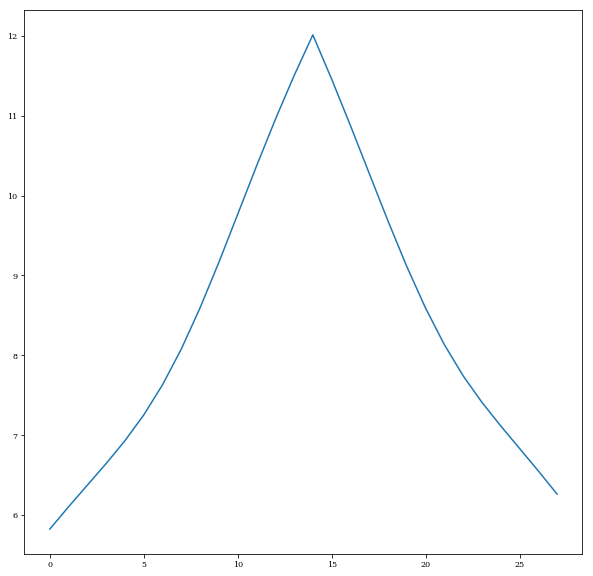

In [141]:
plt.plot(np.correlate(C[3,:], C[5,:], mode='same'))

## Черновик

36

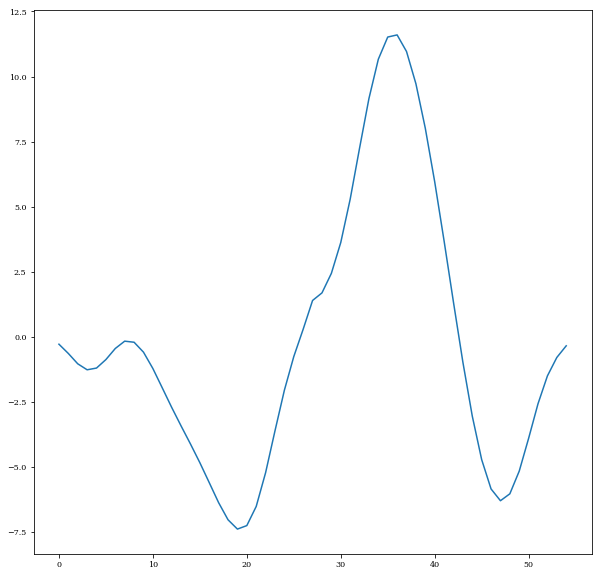

In [158]:
o = np.correlate(C[2,:], C[10,:], "full")
plt.plot(o)
np.argmax(o)
